In [1]:
%load_ext autoreload
%autoreload 2

In [32]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import xarray as xr
from pyedflib import highlevel
import yasa
import tqdm
import mne
from functools import reduce
from params import *
import ghibtools as gh
import seaborn as sns

## PARAMS

In [16]:
save_df_spindles = True
save_all_spindles = True

## FIND SPINDLES WITH YASA

In [25]:
def detect_spindles(patient, srate=srate, chan = eeg_chans, save=False , stages=compute_stages):
    input_file = f'../dataarray/da_staged_{patient}.nc'
    da = xr.load_dataarray(input_file)
    concat = []
    for stage in compute_stages:
        print(stage)
        data = da.sel(stage = stage, chan = chan).dropna(dim='time').values

        # Apply the detection
                
        sp = yasa.spindles_detect(data=data, sf=srate, ch_names=chan, multi_only=False, remove_outliers=True)
                
        # Get the full detection dataframe
        if not sp is None:
            all_spindles = sp.summary()  
            all_spindles.insert(0 , 'stage', stage)
            all_spindles.insert(0 , 'patient', patient)
            concat.append(all_spindles) 
        
    df_return = pd.concat(concat)
    if save: 
        df_return.to_excel(f'../df_analyse/spindles_{patient}.xlsx')
    return df_return

In [26]:
spindles_all_concat = []
for patient in patients:
    print(patient)
    spindles = detect_spindles(patient, save=save_df_spindles)
    spindles_all_concat.append(spindles)

P1
W
R


20-May-22 18:06:00 | WARNING | No spindle were found in channel Fp2-C4.
20-May-22 18:06:00 | WARNING | No spindle were found in channel C4-T4.
20-May-22 18:06:01 | WARNING | No spindle were found in channel Fz-Cz.
20-May-22 18:06:02 | WARNING | No spindle were found in channel Cz-Pz.
20-May-22 18:06:03 | WARNING | No spindle were found in channel Fp1-C3.
20-May-22 18:06:03 | WARNING | No spindle were found in channel C3-T3.
20-May-22 18:06:04 | WARNING | No spindle were found in channel T3-O1.


N2
N3


20-May-22 18:06:19 | WARNING | No spindle were found in channel T4-O2.
20-May-22 18:06:19 | WARNING | No spindle were found in channel Cz-Pz.
20-May-22 18:06:20 | WARNING | No spindle were found in channel T3-O1.


P2
W


20-May-22 18:06:26 | WARNING | No spindle were found in channel Fz-Cz.


R
N2
N3


20-May-22 18:06:57 | WARNING | No spindle were found in channel Fp2-C4.
20-May-22 18:06:57 | WARNING | No spindle were found in channel T4-O2.
20-May-22 18:06:59 | WARNING | No spindle were found in channel T3-O1.


P3
W
R
N2
N3


20-May-22 18:07:38 | WARNING | No spindle were found in channel T4-O2.


P4
W
R


20-May-22 18:08:01 | WARNING | No spindle were found in channel T4-O2.
20-May-22 18:08:02 | WARNING | No spindle were found in channel Cz-Pz.


N2
N3


20-May-22 18:08:20 | WARNING | No spindle were found in channel T4-O2.


P5
W
R


20-May-22 18:08:39 | WARNING | No spindle were found in channel T4-O2.
20-May-22 18:08:41 | WARNING | No spindle were found in channel T3-O1.


N2
N3


20-May-22 18:08:56 | WARNING | No spindle were found in channel C4-T4.
20-May-22 18:08:56 | WARNING | No spindle were found in channel T4-O2.
20-May-22 18:08:56 | WARNING | No spindle were found in channel Cz-Pz.
20-May-22 18:08:56 | WARNING | No spindle were found in channel Fp1-C3.
20-May-22 18:08:56 | WARNING | No spindle were found in channel C3-T3.
20-May-22 18:08:56 | WARNING | No spindle were found in channel T3-O1.


P6
W


20-May-22 18:09:06 | WARNING | No spindle were found in channel Fp2-C4.
20-May-22 18:09:08 | WARNING | No spindle were found in channel Fz-Cz.


R


20-May-22 18:09:12 | WARNING | No spindle were found in channel Fz-Cz.
20-May-22 18:09:13 | WARNING | No spindle were found in channel Cz-Pz.
20-May-22 18:09:13 | WARNING | No spindle were found in channel C3-T3.


N2
N3


20-May-22 18:09:26 | WARNING | No spindle were found in channel Fp2-C4.
20-May-22 18:09:26 | WARNING | No spindle were found in channel C4-T4.
20-May-22 18:09:26 | WARNING | No spindle were found in channel T4-O2.
20-May-22 18:09:27 | WARNING | No spindle were found in channel Cz-Pz.
20-May-22 18:09:27 | WARNING | No spindle were found in channel Fp1-C3.
20-May-22 18:09:27 | WARNING | No spindle were found in channel C3-T3.
20-May-22 18:09:28 | WARNING | No spindle were found in channel T3-O1.


P7
W
R
N2
N3


20-May-22 18:10:15 | WARNING | No spindle were found in channel T4-O2.
20-May-22 18:10:18 | WARNING | No spindle were found in channel T3-O1.


P8
W


20-May-22 18:10:27 | WARNING | No spindle were found in channel Fz-Cz.
20-May-22 18:10:28 | WARNING | No spindle were found in channel Cz-Pz.


R


20-May-22 18:10:30 | WARNING | No spindle were found in channel Cz-Pz.


N2
N3


20-May-22 18:10:38 | WARNING | No spindle were found in channel Fp2-C4.
20-May-22 18:10:39 | WARNING | No spindle were found in channel C4-T4.
20-May-22 18:10:39 | WARNING | No spindle were found in channel T4-O2.
20-May-22 18:10:39 | WARNING | No spindle were found in channel Cz-Pz.
20-May-22 18:10:39 | WARNING | No spindle were found in channel Fp1-C3.
20-May-22 18:10:40 | WARNING | No spindle were found in channel C3-T3.
20-May-22 18:10:40 | WARNING | No spindle were found in channel T3-O1.


P9
W
R


20-May-22 18:11:01 | WARNING | No spindle were found in channel T4-O2.
20-May-22 18:11:02 | WARNING | No spindle were found in channel Fp1-C3.


N2
N3


20-May-22 18:11:17 | WARNING | No spindle were found in channel Fp2-C4.
20-May-22 18:11:17 | WARNING | No spindle were found in channel C4-T4.
20-May-22 18:11:17 | WARNING | No spindle were found in channel T4-O2.
20-May-22 18:11:17 | WARNING | No spindle were found in channel Fz-Cz.
20-May-22 18:11:17 | WARNING | No spindle were found in channel Cz-Pz.
20-May-22 18:11:18 | WARNING | No spindle were found in channel Fp1-C3.
20-May-22 18:11:18 | WARNING | No spindle were found in channel C3-T3.
20-May-22 18:11:18 | WARNING | No spindle were found in channel T3-O1.
20-May-22 18:11:18 | WARNING | No spindles were found in data. Returning None.


P10
W
R


20-May-22 18:11:40 | WARNING | No spindle were found in channel C4-T4.
20-May-22 18:11:43 | WARNING | No spindle were found in channel C3-T3.


N2
N3


20-May-22 18:12:02 | WARNING | No spindle were found in channel Fp2-C4.
20-May-22 18:12:02 | WARNING | No spindle were found in channel C4-T4.
20-May-22 18:12:02 | WARNING | No spindle were found in channel T4-O2.
20-May-22 18:12:03 | WARNING | No spindle were found in channel Fz-Cz.
20-May-22 18:12:03 | WARNING | No spindle were found in channel Cz-Pz.
20-May-22 18:12:03 | WARNING | No spindle were found in channel Fp1-C3.
20-May-22 18:12:04 | WARNING | No spindle were found in channel C3-T3.
20-May-22 18:12:04 | WARNING | No spindle were found in channel T3-O1.
20-May-22 18:12:04 | WARNING | No spindles were found in data. Returning None.


In [27]:
spindles_all_patient = pd.concat(spindles_all_concat)
if save_all_spindles:
    spindles_all_patient.to_excel('../df_analyse/spindles_all_patients.xlsx')

In [28]:
spindles_all_crop = spindles_all_patient.loc[:,['patient','stage','Duration','Amplitude','Frequency']]

In [29]:
spindles_all_crop

,patient,stage,Duration,Amplitude,Frequency
0,P1,W,0.980469,57.420250,13.153248
1,P1,W,0.832031,50.192098,13.230707
2,P1,W,0.957031,35.588988,14.076669
3,P1,W,1.105469,41.109137,13.262335
4,P1,W,0.699219,38.720417,12.814406
...,...,...,...,...,...
2667,P10,N2,0.554688,31.118556,13.017753
2668,P10,N2,0.523438,25.437377,13.624334
2669,P10,N2,0.628906,31.801027,13.726640
2670,P10,N2,0.644531,34.620598,13.607499


<AxesSubplot:>

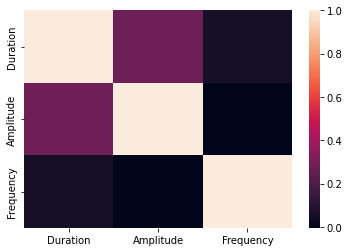

In [37]:
sns.heatmap(spindles_all_crop.corr())

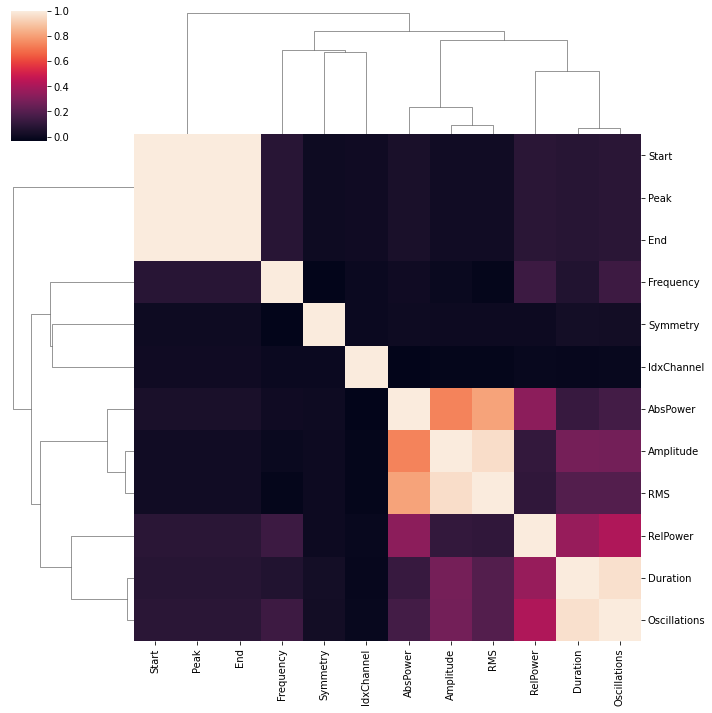

In [40]:
sns.clustermap(spindles_all_patient.corr())

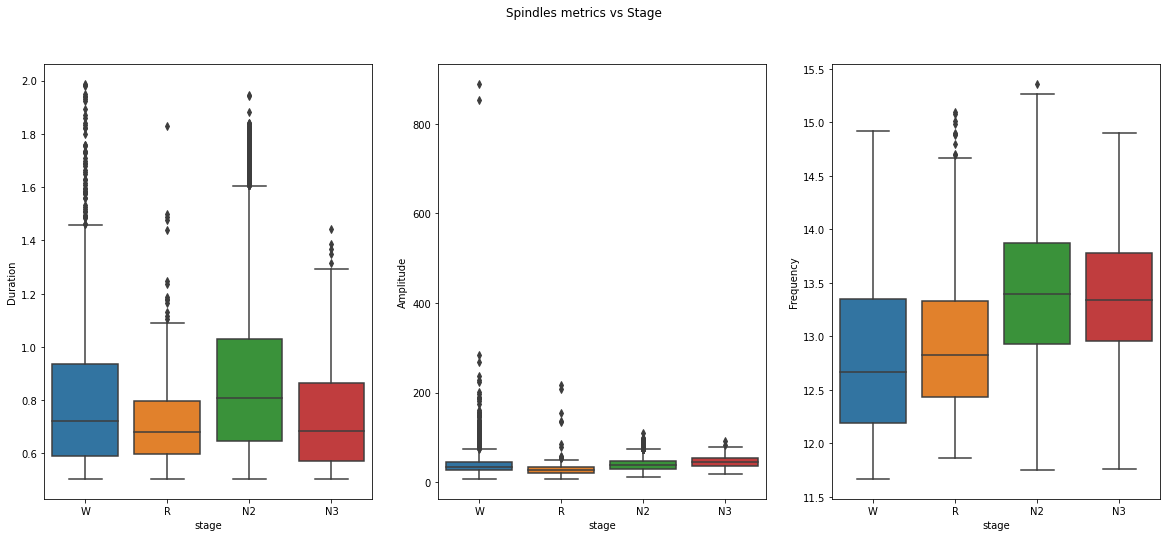

In [55]:
fig, axs = plt.subplots(ncols = 3, figsize = (20,8))
fig.suptitle('Spindles metrics vs Stage')
for col, metric in enumerate(['Duration','Amplitude','Frequency']):
    ax = axs[col]
    sns.boxplot(data=spindles_all_crop, x='stage', y=metric, ax=ax)

/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Un-successfull transformation


/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Un-successfull transformation


/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Un-successfull transformation


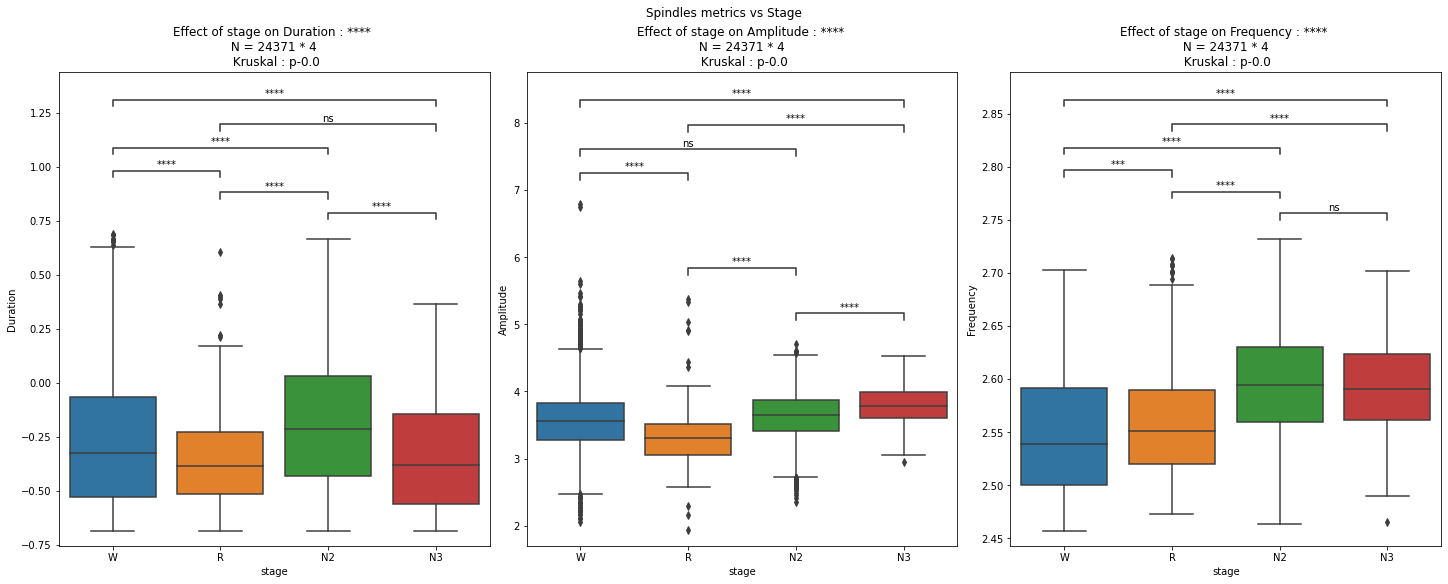

In [57]:
fig, axs = plt.subplots(ncols = 3, figsize = (20,8), constrained_layout = True)
fig.suptitle('Spindles metrics vs Stage')
for col, metric in enumerate(['Duration','Amplitude','Frequency']):
    ax = axs[col]
    gh.auto_stats(df=spindles_all_crop, predictor='stage', outcome=metric, design = 'between', ax=ax)